<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Methods_to_handle_missing_time_series_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
from __future__ import absolute_import, division, print_function, unicode_literals


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import os
from datetime import datetime

from download import download

In [147]:
from google.colab import files
uploaded = files.upload()

Saving Air Quality Data - Time Series.csv to Air Quality Data - Time Series (5).csv


In [148]:
df = pd.read_csv('Air Quality Data - Time Series.csv')

In [149]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [150]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')  

In [151]:
df2 = pd.read_csv('Air Quality Data - Time Series.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=False)

In [152]:
df2.head()

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2013-03-01 01:00:00,2,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,2013-03-01 02:00:00,3,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,2013-03-01 03:00:00,4,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,2013-03-01 04:00:00,5,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [154]:
#df2['month'] = pd.to_numeric(df2['month'])

In [155]:
df2.shape

(35064, 15)

In [156]:
df2.isnull().sum()

year_month_day_hour       0
No                        0
PM2.5                   696
PM10                    484
SO2                     669
NO2                     754
CO                     1297
O3                     1078
TEMP                     19
PRES                     19
DEWP                     19
RAIN                     19
wd                       79
WSPM                     13
station                   0
dtype: int64

In [157]:
df2.isnull().mean()

year_month_day_hour    0.000000
No                     0.000000
PM2.5                  0.019849
PM10                   0.013803
SO2                    0.019079
NO2                    0.021504
CO                     0.036990
O3                     0.030744
TEMP                   0.000542
PRES                   0.000542
DEWP                   0.000542
RAIN                   0.000542
wd                     0.002253
WSPM                   0.000371
station                0.000000
dtype: float64

In [158]:
df2.query("TEMP != TEMP")

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
17263,2015-02-18 07:00:00,17264,16.0,16.0,11.0,31.0,400.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong
31047,2016-09-14 15:00:00,31048,74.0,78.0,6.0,19.0,800.0,187.0,NaN,NaN,NaN,NaN,SW,3.1,Wanshouxigong
31315,2016-09-25 19:00:00,31316,174.0,174.0,3.0,77.0,2200.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong
31316,2016-09-25 20:00:00,31317,162.0,162.0,3.0,63.0,1800.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong
31317,2016-09-25 21:00:00,31318,100.0,100.0,3.0,32.0,1300.0,126.0,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong
31318,2016-09-25 22:00:00,31319,89.0,89.0,3.0,28.0,1200.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong
31319,2016-09-25 23:00:00,31320,87.0,87.0,3.0,34.0,1200.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,Wanshouxigong
31320,2016-09-26 00:00:00,31321,85.0,85.0,3.0,34.0,1200.0,61.0,NaN,NaN,NaN,NaN,NE,2.4,Wanshouxigong
33872,2017-01-10 08:00:00,33873,7.0,9.0,4.0,24.0,NaN,48.0,NaN,NaN,NaN,NaN,NW,2.6,Wanshouxigong
33882,2017-01-10 18:00:00,33883,65.0,107.0,19.0,82.0,NaN,9.0,NaN,NaN,NaN,NaN,SW,2.0,Wanshouxigong


In [159]:
df2.query("TEMP != TEMP").isnull().sum()

year_month_day_hour     0
No                      0
PM2.5                   0
PM10                    0
SO2                     0
NO2                     0
CO                      2
O3                      0
TEMP                   19
PRES                   19
DEWP                   19
RAIN                   19
wd                     13
WSPM                   13
station                 0
dtype: int64

In [160]:
df2[df2['PM2.5'].isnull()]

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1095,2013-04-15 15:00:00,1096,NaN,172.0,63.0,40.0,1899.0,107.0,18.6,993.5,2.0,0.0,ESE,2.3,Wanshouxigong
1142,2013-04-17 14:00:00,1143,NaN,61.0,20.0,21.0,800.0,92.0,17.1,1001.4,-2.1,0.0,S,1.2,Wanshouxigong
1816,2013-05-15 16:00:00,1817,NaN,23.0,28.0,18.0,NaN,NaN,26.8,1007.8,8.2,0.0,WSW,2.3,Wanshouxigong
2293,2013-06-04 13:00:00,2294,NaN,143.0,75.0,56.0,3399.0,68.0,22.8,1005.3,15.4,0.0,E,2.1,Wanshouxigong
2294,2013-06-04 14:00:00,2295,NaN,146.0,14.0,13.0,2799.0,57.0,20.7,1005.8,16.7,0.0,NE,2.9,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34992,2017-02-26 00:00:00,34993,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1020.7,-8.6,0.0,NNE,1.0,Wanshouxigong
35005,2017-02-26 13:00:00,35006,NaN,NaN,NaN,NaN,NaN,NaN,12.4,1020.0,-8.2,0.0,NW,1.2,Wanshouxigong
35027,2017-02-27 11:00:00,35028,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1018.3,-5.6,0.0,ESE,1.4,Wanshouxigong
35028,2017-02-27 12:00:00,35029,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong


In [161]:
figure = px.line(df2, x ='year_month_day_hour', y = 'TEMP', title = 'TEMP over years')

figure.update_xaxes(rangeslider_visible= True)
figure.show()

In [162]:
df3 = df2.set_index('year_month_day_hour')

In [163]:
df3.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
2013-03-01 01:00:00,2,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2013-03-01 02:00:00,3,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
2013-03-01 03:00:00,4,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
2013-03-01 04:00:00,5,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [171]:
df3_no_null = df3.dropna()

In [172]:
df3_no_null.isnull().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [173]:
df2.isnull().sum()

year_month_day_hour       0
No                        0
PM2.5                   696
PM10                    484
SO2                     669
NO2                     754
CO                     1297
O3                     1078
TEMP                     19
PRES                     19
DEWP                     19
RAIN                     19
wd                       79
WSPM                     13
station                   0
dtype: int64

In [174]:
df3_no_null.loc['2014':'2016']

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,
2014-01-01 01:00:00,7346,72.0,174.0,39.0,88.0,1900.0,1.0,-2.2,1006.5,-12.3,0.0,W,0.8,Wanshouxigong
2014-01-01 02:00:00,7347,80.0,192.0,51.0,88.0,2200.0,1.0,-3.3,1006.5,-12.5,0.0,WSW,0.4,Wanshouxigong
2014-01-01 03:00:00,7348,89.0,213.0,53.0,88.0,2600.0,1.0,-1.3,1005.8,-12.9,0.0,W,1.0,Wanshouxigong
2014-01-01 04:00:00,7349,92.0,211.0,58.0,87.0,3000.0,1.0,-2.9,1005.4,-12.9,0.0,NNE,0.4,Wanshouxigong
2014-01-01 05:00:00,7350,84.0,212.0,62.0,85.0,3100.0,1.0,-1.4,1005.8,-12.7,0.0,ENE,1.5,Wanshouxigong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,33644,449.0,487.0,10.0,153.0,4500.0,4.0,-1.9,1022.0,-6.1,0.0,ESE,0.9,Wanshouxigong
2016-12-31 20:00:00,33645,460.0,492.0,12.0,146.0,4100.0,4.0,-2.5,1022.4,-5.5,0.0,ENE,0.7,Wanshouxigong
2016-12-31 21:00:00,33646,463.0,498.0,12.0,141.0,4400.0,5.0,-3.0,1022.1,-5.3,0.0,E,0.9,Wanshouxigong


In [175]:
df3_no_null.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       32768 non-null  int64  
 1   PM2.5    32768 non-null  float64
 2   PM10     32768 non-null  float64
 3   SO2      32768 non-null  float64
 4   NO2      32768 non-null  float64
 5   CO       32768 non-null  float64
 6   O3       32768 non-null  float64
 7   TEMP     32768 non-null  float64
 8   PRES     32768 non-null  float64
 9   DEWP     32768 non-null  float64
 10  RAIN     32768 non-null  float64
 11  wd       32768 non-null  object 
 12  WSPM     32768 non-null  float64
 13  station  32768 non-null  object 
dtypes: float64(11), int64(1), object(2)
memory usage: 5.0+ MB


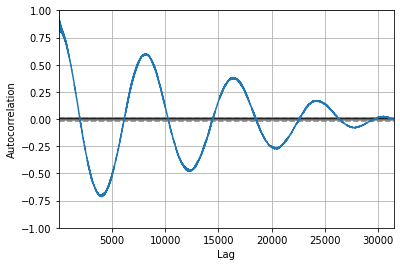

In [181]:
pd.plotting.autocorrelation_plot(df3_no_null['2013':'2016']['TEMP']);

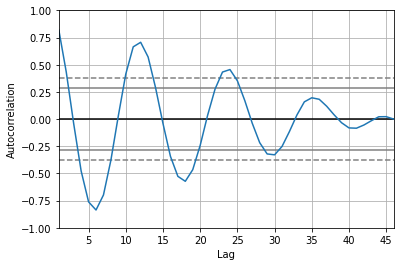

In [180]:
pd.plotting.autocorrelation_plot(df3_no_null['2013':'2016']['TEMP'].resample('1m').mean());

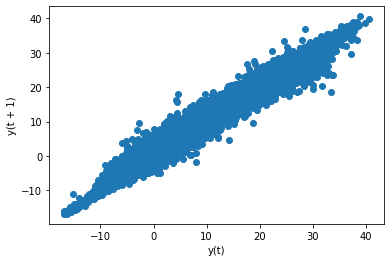

In [183]:
pd.plotting.lag_plot(df3_no_null['TEMP'],lag=1);

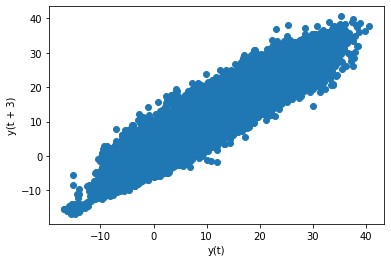

In [184]:
pd.plotting.lag_plot(df3_no_null['TEMP'],lag=3);

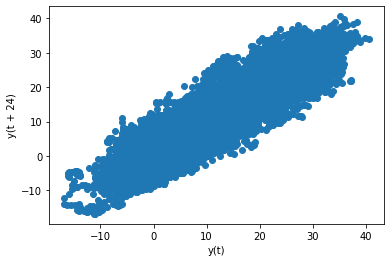

In [185]:
pd.plotting.lag_plot(df3_no_null['TEMP'],lag=24);

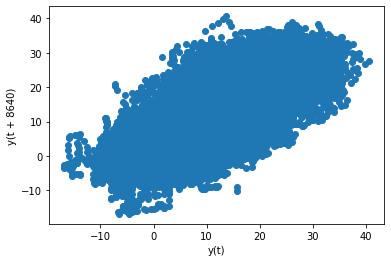

In [186]:
pd.plotting.lag_plot(df3_no_null['TEMP'],lag=8640);

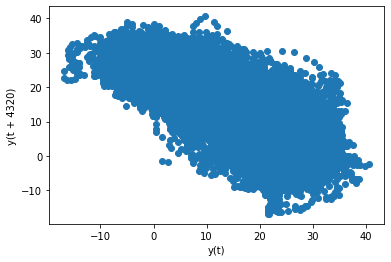

In [187]:
pd.plotting.lag_plot(df3_no_null['TEMP'],lag=4320);

In [194]:
df3_imp = df3['2016-09-25':'2016-09-26'][['TEMP']]

In [195]:
df3_imp

,TEMP
year_month_day_hour,
2016-09-25 00:00:00,21.700000
2016-09-25 01:00:00,21.475000
2016-09-25 02:00:00,20.975000
2016-09-25 03:00:00,20.775000
2016-09-25 04:00:00,21.050000
2016-09-25 05:00:00,21.050000
2016-09-25 06:00:00,20.800000
2016-09-25 07:00:00,20.800000
2016-09-25 08:00:00,20.800000


In [203]:
df3_imp['TEMP_ffill'] = df3['TEMP'].fillna(method='ffill')

In [206]:
df3_imp.drop('TEMP_fill',axis=1,inplace=True)

In [207]:
df3_imp

,TEMP,TEMP_ffill
year_month_day_hour,,
2016-09-25 00:00:00,21.700000,21.700000
2016-09-25 01:00:00,21.475000,21.475000
2016-09-25 02:00:00,20.975000,20.975000
2016-09-25 03:00:00,20.775000,20.775000
2016-09-25 04:00:00,21.050000,21.050000
2016-09-25 05:00:00,21.050000,21.050000
2016-09-25 06:00:00,20.800000,20.800000
2016-09-25 07:00:00,20.800000,20.800000
2016-09-25 08:00:00,20.800000,20.800000


In [209]:
df3_imp['TEMP_bfill'] = df3['TEMP'].fillna(method='bfill')

In [210]:
df3_imp

,TEMP,TEMP_ffill,TEMP_bfill
year_month_day_hour,,,
2016-09-25 00:00:00,21.700000,21.700000,21.700000
2016-09-25 01:00:00,21.475000,21.475000,21.475000
2016-09-25 02:00:00,20.975000,20.975000,20.975000
2016-09-25 03:00:00,20.775000,20.775000,20.775000
2016-09-25 04:00:00,21.050000,21.050000,21.050000
2016-09-25 05:00:00,21.050000,21.050000,21.050000
2016-09-25 06:00:00,20.800000,20.800000,20.800000
2016-09-25 07:00:00,20.800000,20.800000,20.800000
2016-09-25 08:00:00,20.800000,20.800000,20.800000


In [221]:
df3_imp['Rolling fill'] = df3_imp['TEMP'].rolling(window=7, min_periods=1).mean()

In [222]:
df3_imp

,TEMP,TEMP_ffill,TEMP_bfill,Rolling fill
year_month_day_hour,,,,
2016-09-25 00:00:00,21.700000,21.700000,21.700000,21.700000
2016-09-25 01:00:00,21.475000,21.475000,21.475000,21.587500
2016-09-25 02:00:00,20.975000,20.975000,20.975000,21.383333
2016-09-25 03:00:00,20.775000,20.775000,20.775000,21.231250
2016-09-25 04:00:00,21.050000,21.050000,21.050000,21.195000
2016-09-25 05:00:00,21.050000,21.050000,21.050000,21.170833
2016-09-25 06:00:00,20.800000,20.800000,20.800000,21.117857
2016-09-25 07:00:00,20.800000,20.800000,20.800000,20.989286
2016-09-25 08:00:00,20.800000,20.800000,20.800000,20.892857


In [223]:
df3.loc[df3_imp.index + pd.offsets.DateOffset(years=-1)]['TEMP']

year_month_day_hour
2015-09-25 00:00:00    16.4
2015-09-25 01:00:00    16.3
2015-09-25 02:00:00    15.9
2015-09-25 03:00:00    15.9
2015-09-25 04:00:00    15.6
2015-09-25 05:00:00    14.5
2015-09-25 06:00:00    14.2
2015-09-25 07:00:00    15.0
2015-09-25 08:00:00    17.4
2015-09-25 09:00:00    19.0
2015-09-25 10:00:00    21.5
2015-09-25 11:00:00    23.0
2015-09-25 12:00:00    24.1
2015-09-25 13:00:00    24.6
2015-09-25 14:00:00    25.1
2015-09-25 15:00:00    24.3
2015-09-25 16:00:00    25.5
2015-09-25 17:00:00    25.1
2015-09-25 18:00:00    23.5
2015-09-25 19:00:00    18.6
2015-09-25 20:00:00    16.9
2015-09-25 21:00:00    15.5
2015-09-25 22:00:00    14.8
2015-09-25 23:00:00    14.3
2015-09-26 00:00:00    12.6
2015-09-26 01:00:00    12.1
2015-09-26 02:00:00    12.4
2015-09-26 03:00:00    12.8
2015-09-26 04:00:00    12.9
2015-09-26 05:00:00    12.3
2015-09-26 06:00:00    12.6
2015-09-26 07:00:00    13.3
2015-09-26 08:00:00    15.4
2015-09-26 09:00:00    17.2
2015-09-26 10:00:00    18.9


In [224]:
df3_imp = df3_imp.reset_index()

In [225]:
df3_imp

,year_month_day_hour,TEMP,TEMP_ffill,TEMP_bfill,Rolling fill
0,2016-09-25 00:00:00,21.700000,21.700000,21.700000,21.700000
1,2016-09-25 01:00:00,21.475000,21.475000,21.475000,21.587500
2,2016-09-25 02:00:00,20.975000,20.975000,20.975000,21.383333
3,2016-09-25 03:00:00,20.775000,20.775000,20.775000,21.231250
4,2016-09-25 04:00:00,21.050000,21.050000,21.050000,21.195000
5,2016-09-25 05:00:00,21.050000,21.050000,21.050000,21.170833
6,2016-09-25 06:00:00,20.800000,20.800000,20.800000,21.117857
7,2016-09-25 07:00:00,20.800000,20.800000,20.800000,20.989286
8,2016-09-25 08:00:00,20.800000,20.800000,20.800000,20.892857
9,2016-09-25 09:00:00,21.975000,21.975000,21.975000,21.035714


In [234]:
df3_imp['Offset(-1)'] =df3_imp.apply(lambda x: df3.loc[x['year_month_day_hour'] + pd.offsets.DateOffset(years=-1)]['TEMP'] if pd.isna(x['TEMP']) else x['TEMP'], axis=1)


In [236]:
df3_imp

,year_month_day_hour,TEMP,TEMP_ffill,TEMP_bfill,Rolling fill,Offset(-1)
0,2016-09-25 00:00:00,21.700000,21.700000,21.700000,21.700000,21.700000
1,2016-09-25 01:00:00,21.475000,21.475000,21.475000,21.587500,21.475000
2,2016-09-25 02:00:00,20.975000,20.975000,20.975000,21.383333,20.975000
3,2016-09-25 03:00:00,20.775000,20.775000,20.775000,21.231250,20.775000
4,2016-09-25 04:00:00,21.050000,21.050000,21.050000,21.195000,21.050000
5,2016-09-25 05:00:00,21.050000,21.050000,21.050000,21.170833,21.050000
6,2016-09-25 06:00:00,20.800000,20.800000,20.800000,21.117857,20.800000
7,2016-09-25 07:00:00,20.800000,20.800000,20.800000,20.989286,20.800000
8,2016-09-25 08:00:00,20.800000,20.800000,20.800000,20.892857,20.800000
9,2016-09-25 09:00:00,21.975000,21.975000,21.975000,21.035714,21.975000
